# test script VA

In [6]:
!python scripts/VA/VAbenchmarks.py

usage: VAbenchmarks.py [-h] [--plot-figure] [--use-views] [--use-assembly]
                       [--use-csa] [--debug DEBUG]
                       simulator benchmark
VAbenchmarks.py: error: the following arguments are required: simulator, benchmark


# run it

In [7]:
%run scripts/VA/VAbenchmarks.py brian2 COBA --plot-figure


Host #1 is on 7f88c7ac2e7b
0 Initialising the simulator with 1 thread(s)...
0 Creating cell populations...
0 Initialising membrane potential to random values...
0 Connecting populations...
0 Setting up recording...0% 
0 Running simulation...


INFO       No numerical integration method specified for group 'neurongroup_2', using method 'euler' (took 0.00s, trying other methods took 0.02s). [brian2.stateupdaters.base.method_choice]
INFO       No numerical integration method specified for group 'neurongroup_3', using method 'euler' (took 0.00s, trying other methods took 0.02s). [brian2.stateupdaters.base.method_choice]


0 Writing data to file...

--- Vogels-Abbott Network Simulation ---
Nodes                  : 1
Simulation type        : COBA
Number of Neurons      : 4000
Number of Synapses     : 204705 e→e  50757 e→i  50757 i→e  12692 i→i
Excitatory conductance : 4 nS
Inhibitory conductance : 51 nS
Excitatory rate        : 15.9956 Hz
Inhibitory rate        : 15.5375 Hz
Build time             : 231.607 s
Simulation time        : 6.17703 s
Writing time           : 0.0625494 s


# open the results

In [22]:
folder = '20251215'# place here your correct folder
fileSuffix = '20251215-103051'
with open(f"scripts/VA/Results/{folder}/VAbenchmarks_COBA_exc_brian2_np1_{fileSuffix}.pkl", "rb") as f:
    data_exc = pickle.load(f)

with open(f"scripts/VA/Results/{folder}/VAbenchmarks_COBA_inh_brian2_np1_{fileSuffix}.pkl", "rb") as f:
    data_inh = pickle.load(f)



In [9]:
print(data_exc.annotations.get("label"), [s.name for s in data_exc.segments[0].analogsignals])
print(data_inh.annotations.get("label"), [s.name for s in data_inh.segments[0].analogsignals])


Excitatory_Cells ['gsyn_inh', 'gsyn_exc', 'v']
Inhibitory_Cells ['gsyn_inh', 'gsyn_exc', 'v']


In [13]:
import numpy as np, matplotlib.pyplot as plt
import pickle

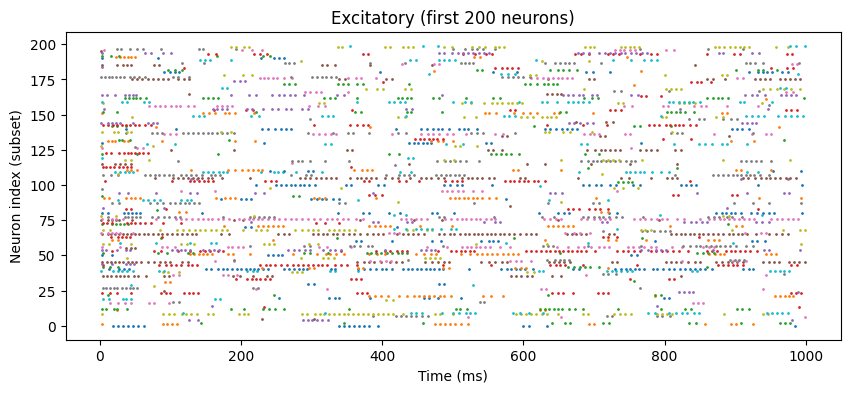

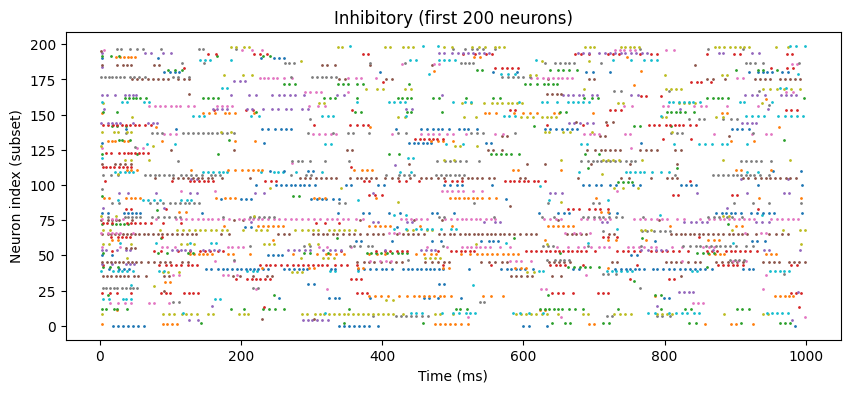

In [14]:
segE=data_exc.segments[0]
segI=data_inh.segments[0]
stE=segE.spiketrains
stI=segI.spiketrains
vE=segE.analogsignals[0] if len(segE.analogsignals)>0 else None

def raster(spiketrains,nmax=200,dt0=0.0,dt1=None,title="Raster"):
    n=min(len(spiketrains),nmax)
    plt.figure(figsize=(10,4))
    for i in range(n):
        t=spiketrains[i].rescale("ms").magnitude
        if dt1 is not None:
            t=t[(t>=dt0)&(t<=dt1)]
        plt.scatter(t,np.full_like(t,i),s=1)
    plt.xlabel("Time (ms)")
    plt.ylabel("Neuron index (subset)")
    plt.title(f"{title} (first {n} neurons)")
    plt.show()

raster(stE,nmax=200,title="Excitatory")
raster(stI,nmax=200,title="Inhibitory")


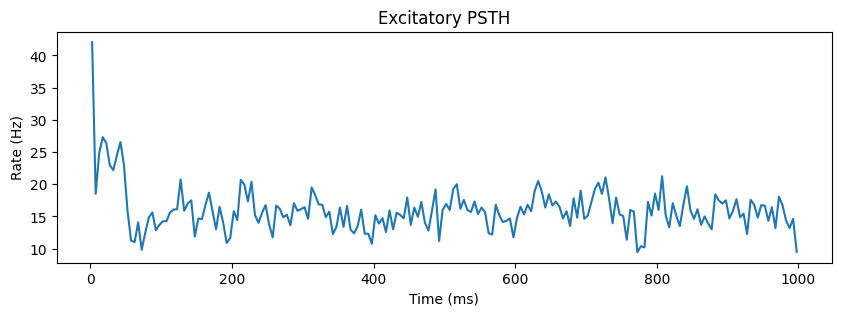

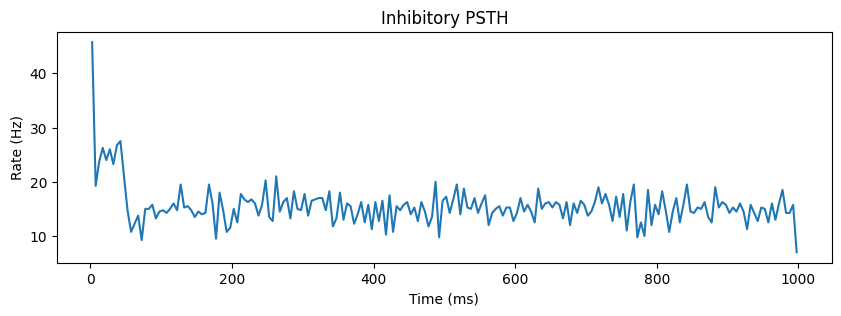

In [15]:
def psth(spiketrains,tstop=1000.0,bin_ms=5.0,title="PSTH"):
    bins=np.arange(0,tstop+bin_ms,bin_ms)
    h=np.zeros(len(bins)-1,dtype=float)
    for st in spiketrains:
        t=st.rescale("ms").magnitude
        h+=np.histogram(t,bins=bins)[0]
    rate=h/len(spiketrains)/(bin_ms/1000.0)
    tc=0.5*(bins[:-1]+bins[1:])
    plt.figure(figsize=(10,3))
    plt.plot(tc,rate)
    plt.xlabel("Time (ms)")
    plt.ylabel("Rate (Hz)")
    plt.title(title)
    plt.show()
    return tc,rate

tE,rE=psth(stE,title="Excitatory PSTH")
tI,rI=psth(stI,title="Inhibitory PSTH")


# computing the balance of the network

In [20]:
segE = data_exc.segments[0]
sigE = {s.name: s for s in segE.analogsignals}
gE_E = sigE["gsyn_exc"].rescale("uS").magnitude
gI_E = sigE["gsyn_inh"].rescale("uS").magnitude
tE   = sigE["gsyn_exc"].times.rescale("ms").magnitude
balE = gE_E / (gE_E + gI_E + 1e-12)
print("Mean conductance-balance (exc, first 2 cells):",
      np.mean(balE, axis=0))


Mean conductance-balance (exc, first 2 cells): [0.24516089 0.20351746]


In [21]:
segI=data_inh.segments[0]
sig={s.name:s for s in segI.analogsignals}
gE=sig["gsyn_exc"].rescale("uS").magnitude
gI=sig["gsyn_inh"].rescale("uS").magnitude
t=sig["gsyn_exc"].times.rescale("ms").magnitude

bal=(gE)/(gE+gI+1e-12)
print("Mean conductance-balance (first 2 inh cells):",np.mean(bal))


Mean conductance-balance (first 2 inh cells): 0.22433917807613726


In [ ]:
# try change the weight in the VAbenchmark and test the balance
# ...
# ...

# advance: try sweeping E/I weights and trying in replicating figure 1 of VA paper 2025

# advance: test logic gates in VA network